In [ ]:
#Importing Libraries
import pandas as pd                 
import numpy as np                  
import matplotlib.pyplot as plt     
import seaborn as sns               
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set up the plotting style
plt.style.use('default')
sns.set_palette('husl')

In [ ]:
#Understand the Dataset
df = pd.read_csv('E:\Python Projects\Life Expectancy Data.csv')     # read CSV into pandas DataFrame

In [3]:
df.shape

(2938, 22)

In [4]:
df.head(5) 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [7]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Calculate the count and percentage of missing values for every column.
missing_data = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Missing_Percentage', ascending=False)

print("--- Missing Value Analysis ---")
print(missing_data[missing_data['Missing_Count'] > 0])

--- Missing Value Analysis ---
                                 Missing_Count  Missing_Percentage
Population                                 652           22.191967
Hepatitis_B                                553           18.822328
GDP                                        448           15.248468
Total_expenditure                          226            7.692308
Alcohol                                    194            6.603131
Income_composition_of_resources            167            5.684139
Schooling                                  163            5.547992
thinness__1-19_years                        34            1.157250
thinness_5-9_years                          34            1.157250
BMI                                         34            1.157250
Diphtheria                                  19            0.646698
Polio                                       19            0.646698
Life_expectancy                             10            0.340368
Adult_Mortality                

In [ ]:
#mean imputation
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

df.isnull().sum().max()

0

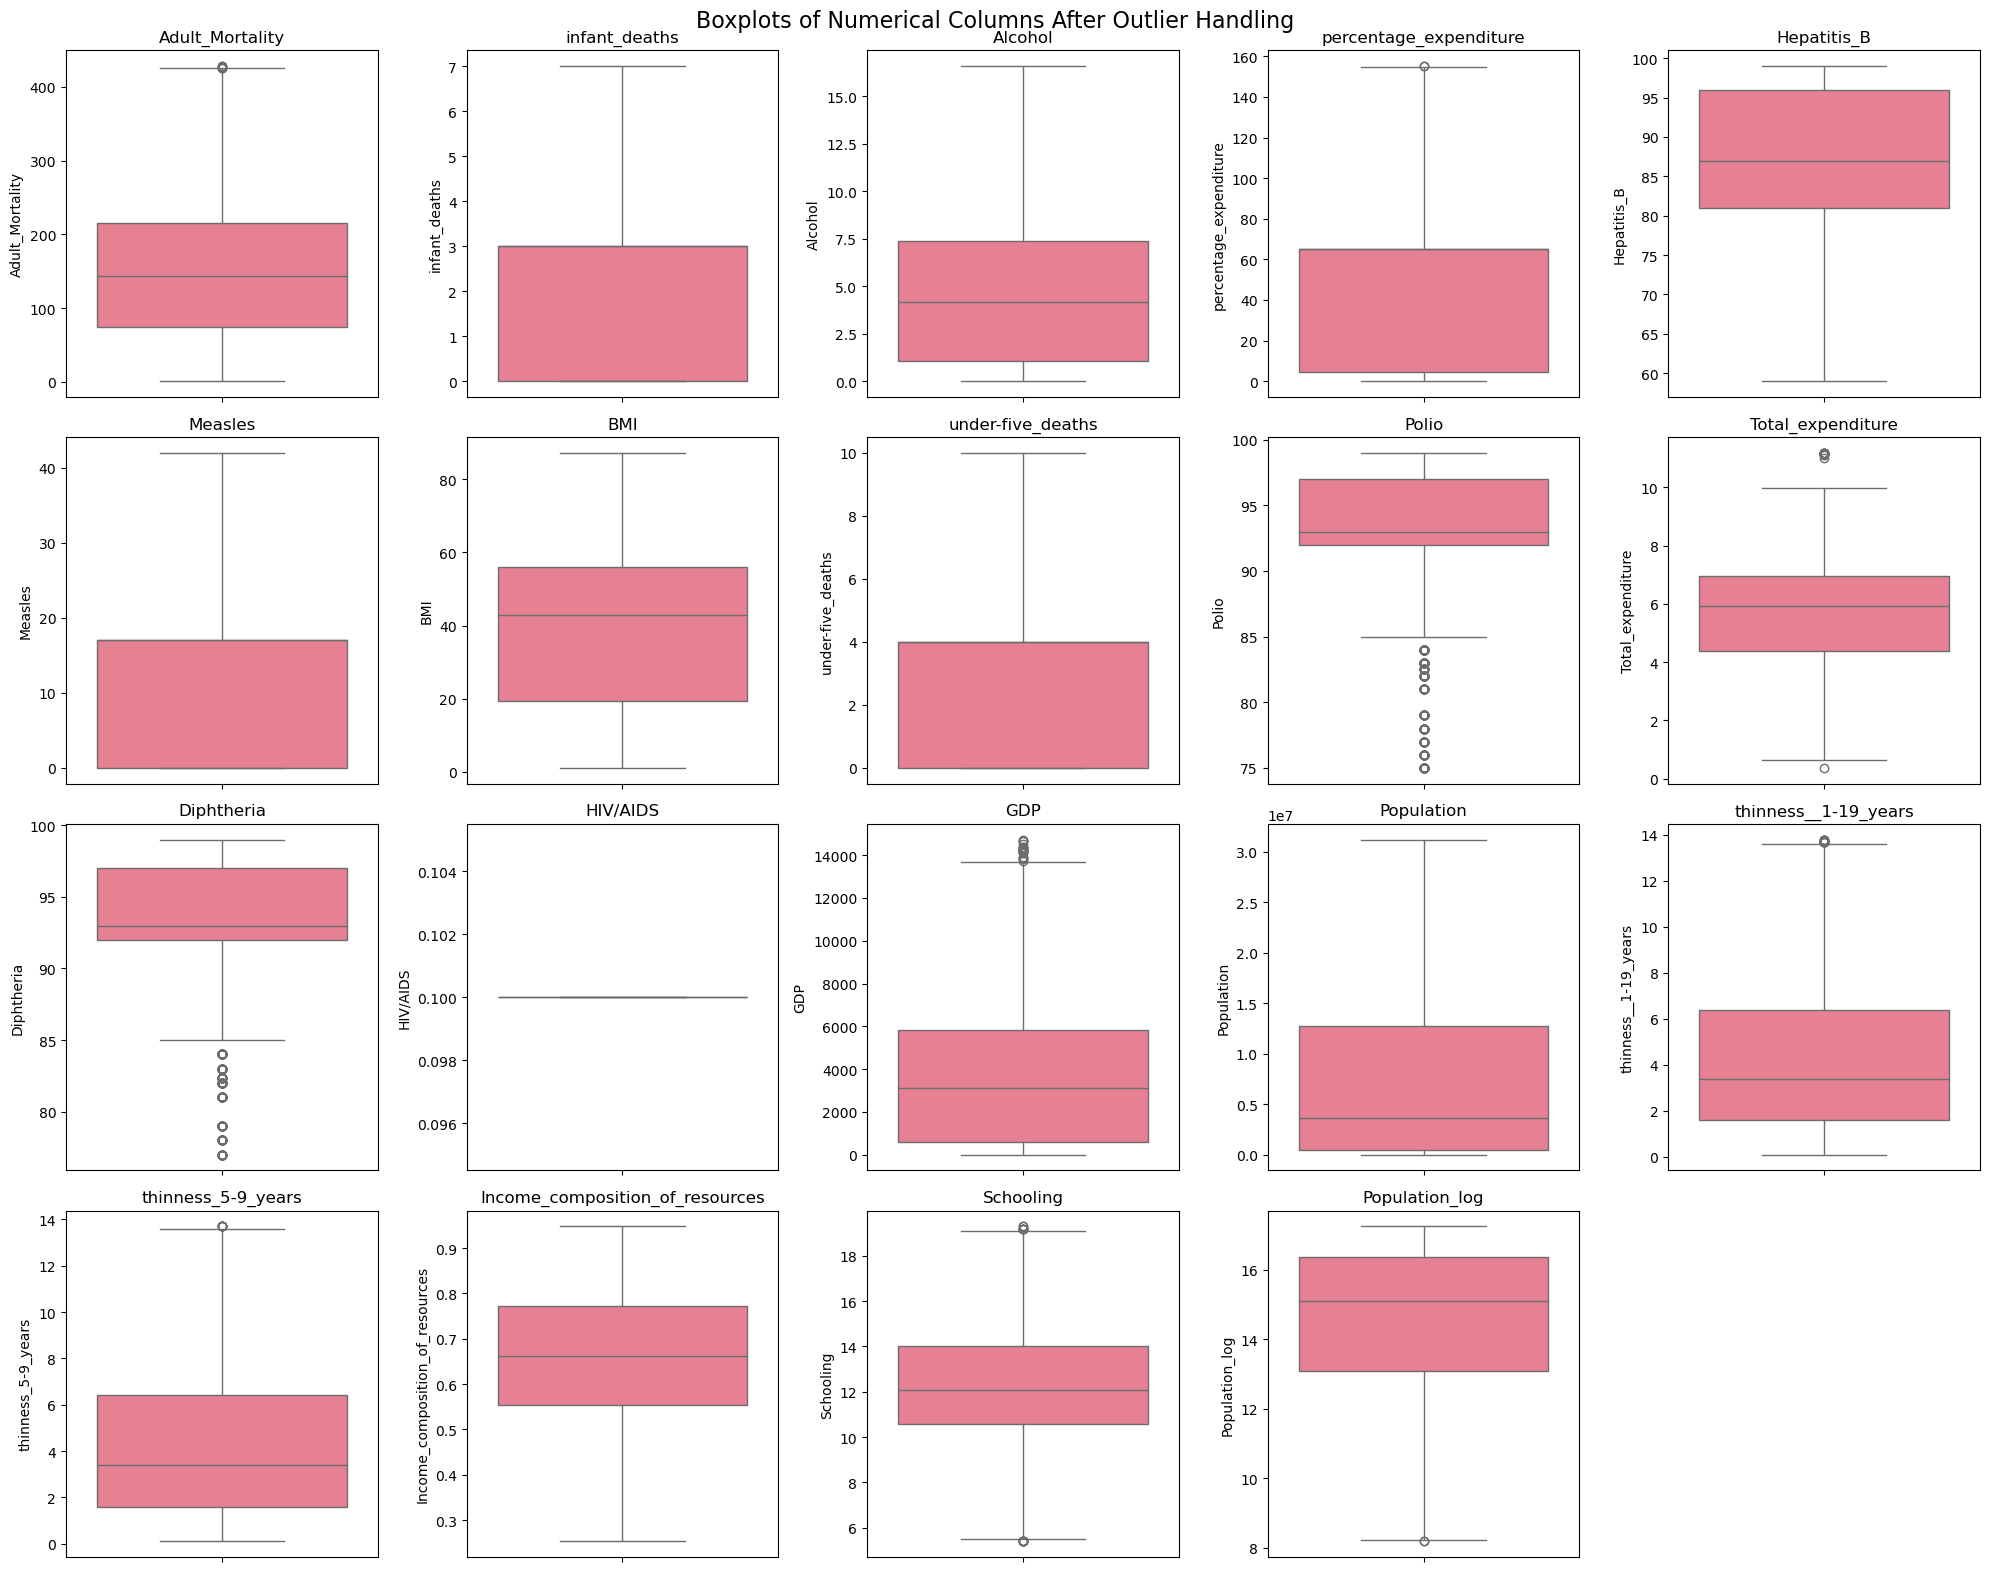

In [22]:
# Outlier Implementation 

# We include all other numeric features that might have outliers.
outlier_cols = df.select_dtypes(include=np.number).columns.drop(['Life_expectancy', 'Year']).tolist()

for column in outlier_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    column_median = df[column].median()
    
    df[column] = np.where(
        (df[column] > upper_bound) | (df[column] < lower_bound), column_median,df[column]
    )


# Create boxplots to visualize the distribution
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns After Outlier Handling', fontsize=16)

axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(outlier_cols):
    
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col) 

for j in range(len(outlier_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()

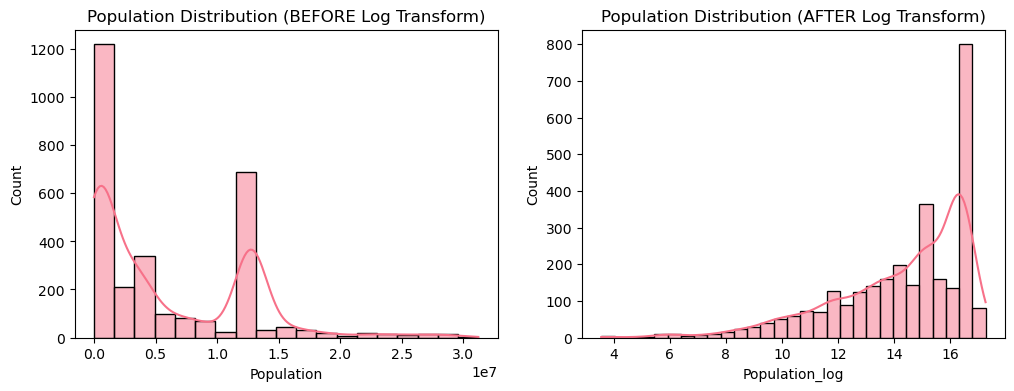

In [ ]:
# Check the distribution of 'Population' before transformation.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) 
sns.histplot(df['Population'], kde=True)
plt.title('Population Distribution (BEFORE Log Transform)')

# Apply the natural logarithm (np.log) transformation to the 'Population' column.
df['Population_log'] = np.log1p(df['Population'])

# Check the distribution of 'Population_log' after transformation.
plt.subplot(1, 2, 2) 
sns.histplot(df['Population_log'], kde=True)
plt.title('Population Distribution (AFTER Log Transform)')
plt.show()



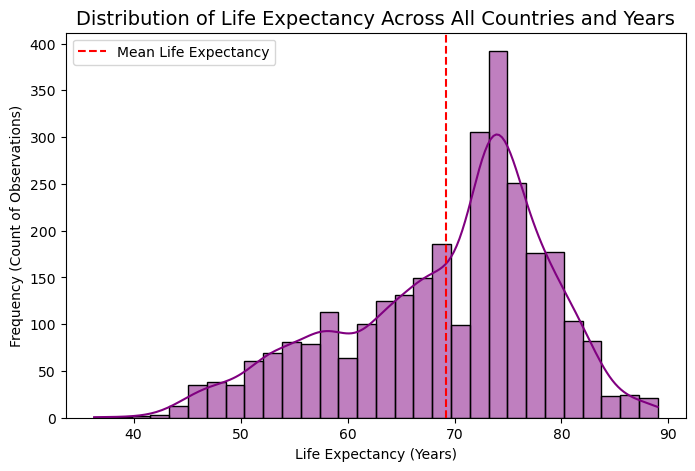

In [ ]:
# Plot the distribution of the target variable, 'Life_expectancy'.
plt.figure(figsize=(8, 5))
sns.histplot(df['Life_expectancy'], bins=30, kde=True, color='purple')
plt.title('Distribution of Life Expectancy Across All Countries and Years', fontsize=14)
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency (Count of Observations)')
plt.axvline(df['Life_expectancy'].mean(), color='red', linestyle='--', label='Mean Life Expectancy')
plt.legend()
plt.show()



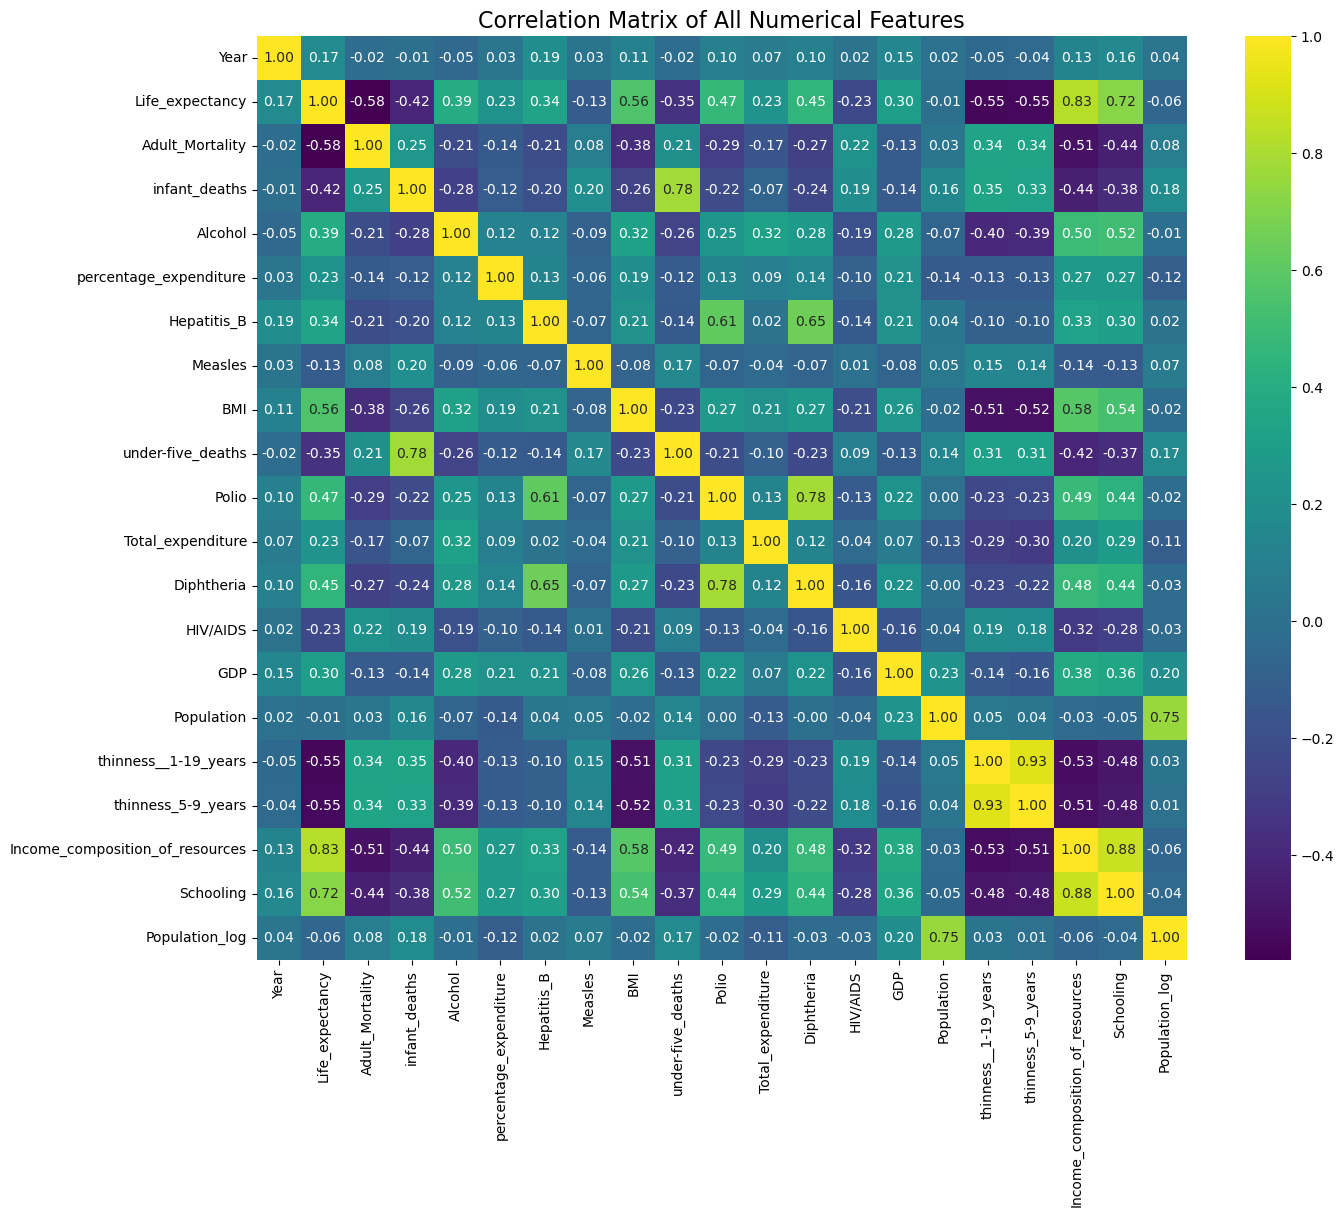


--- Top Correlations with Life Expectancy ---
Income_composition_of_resources    0.826806
Schooling                          0.720284
BMI                                0.559255
Polio                              0.469433
Diphtheria                         0.452859
Name: Life_expectancy, dtype: float64
under-five_deaths      -0.353733
infant_deaths          -0.418043
thinness_5-9_years     -0.546964
thinness__1-19_years   -0.552823
Adult_Mortality        -0.579441
Name: Life_expectancy, dtype: float64


In [ ]:
# Select only numerical columns for correlation calculation.
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix for all numerical features.
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='viridis', annot=True, fmt=".2f")
plt.title('Correlation Matrix of All Numerical Features', fontsize=16)
plt.show()

# Extract correlations with the target variable, 'Life_expectancy', and sort them.
life_corr = correlation_matrix['Life_expectancy'].sort_values(ascending=False).drop('Life_expectancy')
print("\n--- Top Correlations with Life Expectancy ---")
print(life_corr.head(5))
print(life_corr.tail(5))

.

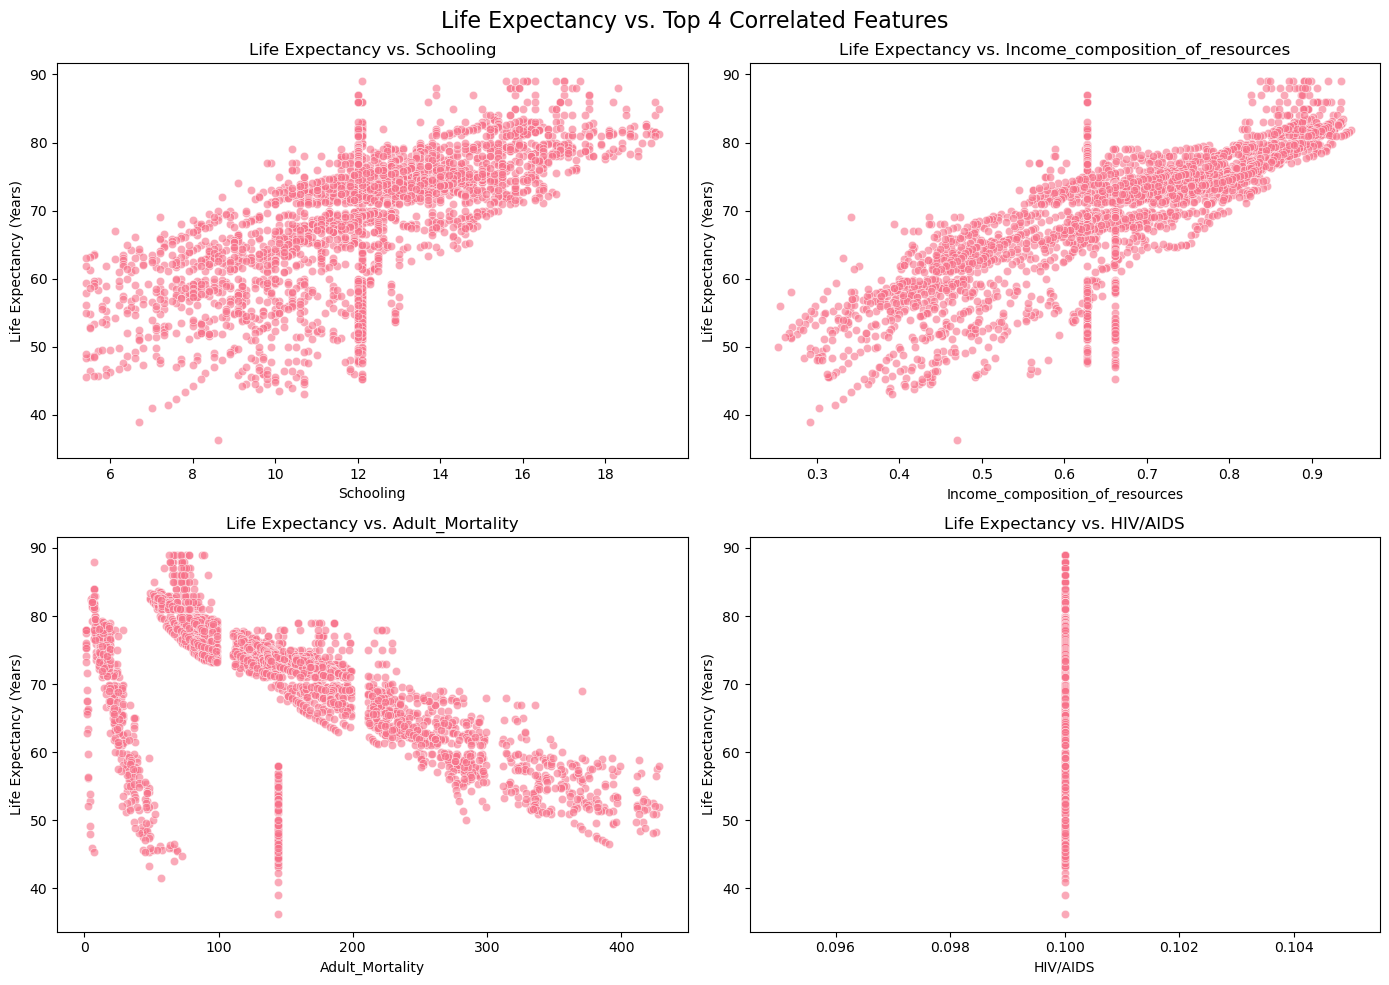

In [23]:
# Based on the correlation matrix, the top 4 most impactful features are:
top_4_features = ['Schooling', 'Income_composition_of_resources', 'Adult_Mortality', 'HIV/AIDS']


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Life Expectancy vs. Top 4 Correlated Features', fontsize=16)
axes = axes.flatten()

for i, feature in enumerate(top_4_features):
    
    sns.scatterplot(x=df[feature], y=df['Life_expectancy'], ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Life Expectancy vs. {feature}', fontsize=12)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Life Expectancy (Years)')

plt.tight_layout()
plt.show()



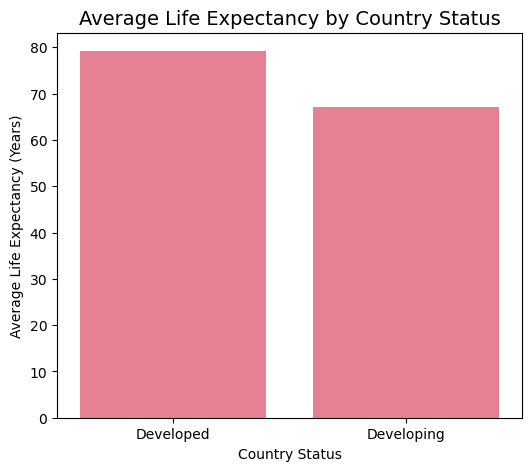

In [25]:
# Life Expectancy by Country Status

# Calculate the mean life expectancy grouped by the Status (Developed or Developing).
life_exp_by_status = df.groupby('Status')['Life_expectancy'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x='Status', y='Life_expectancy', data=life_exp_by_status)
plt.title('Average Life Expectancy by Country Status', fontsize=14)
plt.xlabel('Country Status')
plt.ylabel('Average Life Expectancy (Years)')
plt.show()






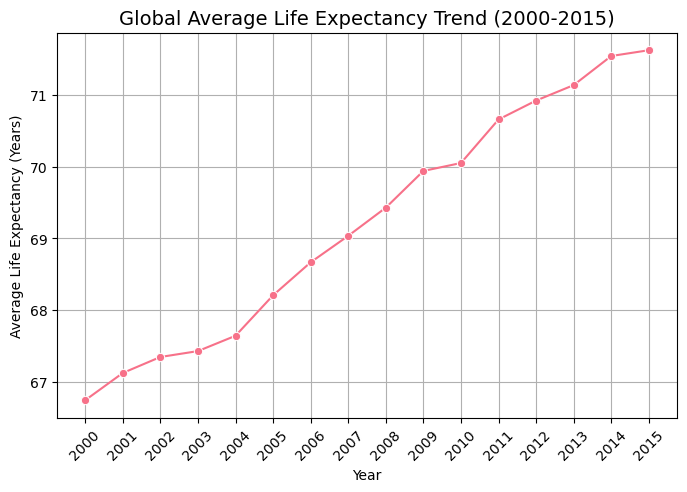

In [24]:
# Life Expectancy Trend Over Time
# Calculate the mean life expectancy grouped by Year.
life_exp_by_year = df.groupby('Year')['Life_expectancy'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='Life_expectancy', data=life_exp_by_year, marker='o')
plt.title('Global Average Life Expectancy Trend (2000-2015)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)')
plt.xticks(life_exp_by_year['Year'].unique(), rotation=45) # Show every year
plt.grid(True)
plt.show()

In [ ]:
#Data Preprocessing
X = df.drop(columns=['Country', 'Year', 'Population', 'Life_expectancy'], axis=1) # Features
y = df['Life_expectancy'] # Target variable

X = pd.get_dummies(X, columns=['Status'], drop_first=True, dtype=int)
X.rename(columns={'Status_Developing': 'Is_Developing'}, inplace=True)

# Initialize the StandardScaler object
scaler = StandardScaler()

# Select all columns that are not the new binary feature 'Is_Developing'.
cols_to_scale = X.columns.drop('Is_Developing')

# Apply the scaling:
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Model Training 

# Initialize the Linear Regression model object.
linear_model = LinearRegression()

# Train the model using the training data (X_train and y_train).
linear_model.fit(X_train, y_train)

# Prediction and Evaluation

# Use the trained model to make predictions on the unseen test data.
y_pred_linear = linear_model.predict(X_test)

# Calculate key performance metrics on the test set.
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print("--- Linear Regression Model Performance ---")
print(f"R-squared (R²): {r2_linear:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.4f} years")



--- Linear Regression Model Performance ---
R-squared (R²): 0.7764
Root Mean Squared Error (RMSE): 4.4011 years


In [ ]:
# Model Training 

# Initialize the Random Forest Regressor model object.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data.
rf_model.fit(X_train, y_train)

#  Prediction and Evaluation

# Use the trained model to make predictions on the test data.
y_pred_rf = rf_model.predict(X_test)

# Calculate key performance metrics on the test set.
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("--- Random Forest Regressor Model Performance ---")
print(f"R-squared (R²): {r2_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f} years")



--- Random Forest Regressor Model Performance ---
R-squared (R²): 0.9622
Root Mean Squared Error (RMSE): 1.8098 years



--- Model Comparison ---
               Model  R² Score  RMSE (Years)
0  Linear Regression  0.776418      4.401146
1      Random Forest  0.962193      1.809814


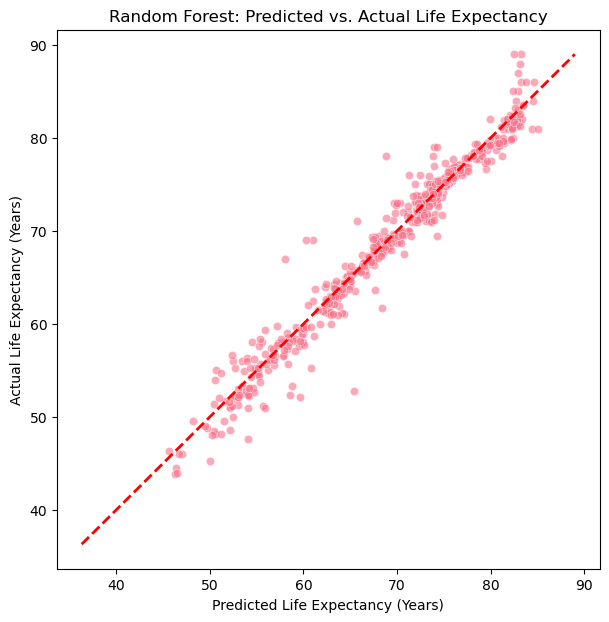

In [ ]:
# Create a small table to compare the model results.
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R² Score': [r2_linear, r2_rf],
    'RMSE (Years)': [rmse_linear, rmse_rf]
})
print("\n--- Model Comparison ---")
print(model_results)

# Create a scatter plot of Predicted vs. Actual values for the Random Forest model.
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_pred_rf, y=y_test, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Random Forest: Predicted vs. Actual Life Expectancy')
plt.xlabel('Predicted Life Expectancy (Years)')
plt.ylabel('Actual Life Expectancy (Years)')
plt.show()



In [ ]:
#  Cross-Validation Implementation (using the best model: Random Forest)

# Perform 5-Fold Cross-Validation: the data is split into 5 equal parts.
cv_scores = cross_val_score(
    rf_model,        
    X, y,            
    cv=5,            
    scoring='r2',    
    n_jobs=-1        
)

# Calculate the mean and standard deviation of the 5 R² scores.
mean_r2 = cv_scores.mean()
std_r2 = cv_scores.std()

print("\n--- 5-Fold Cross-Validation Results (Random Forest) ---")
print(f"R² Scores per fold: {cv_scores}")
print(f"Mean R²: {mean_r2:.4f} ± {std_r2:.4f}")




--- 5-Fold Cross-Validation Results (Random Forest) ---
R² Scores per fold: [0.89884328 0.88584351 0.8809245  0.85667171 0.86656314]
Mean R²: 0.8778 ± 0.0148


C:\Users\Default.DESKTOP-OVNAP5K\AppData\Local\Temp\ipykernel_10964\4176104678.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_8_features.values, y=top_8_features.index, palette='Spectral')


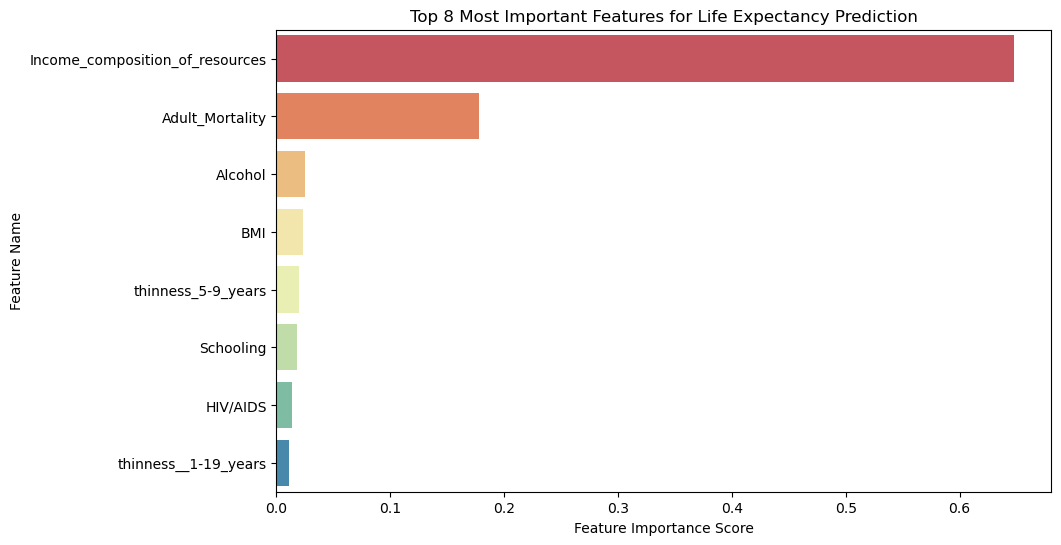

In [ ]:
# Extract the feature importance scores from the trained Random Forest model.
feature_importances = pd.Series(
    rf_model.feature_importances_, 
    index=X_train.columns           
).sort_values(ascending=False)

# Select the top 8 most important features.
top_8_features = feature_importances.head(8)

# Create a bar chart for visual comparison.
plt.figure(figsize=(10, 6))
sns.barplot(x=top_8_features.values, y=top_8_features.index, palette='Spectral')
plt.title('Top 8 Most Important Features for Life Expectancy Prediction')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.show()

